In [13]:
import numpy as np
import pandas as pd

signals=[
    'body_acc_x_',
    'body_acc_y_',
    'body_acc_z_',
    'body_gyro_x_',
    'body_gyro_y_',
    'body_gyro_z_',
    'total_acc_x_',
    'total_acc_y_',
    'total_acc_z_',
]

In [57]:
def read_signals(t):
    X=[]
    for signal in signals:
        filename=f'C:/Users/HP/Desktop/ML/HAR/UCI_HAR_Dataset/{t}/Inertial Signals/{signal}{t}.txt'
        X.append(pd.read_csv(filename,delim_whitespace=True,header=None).to_numpy())

    return np.transpose(X,(1,2,0))

def read_y(t):
    filename=f'C:/Users/HP/Desktop/ML/HAR/UCI_HAR_Dataset/{t}/y_{t}.txt'
    y=pd.read_csv(filename,delim_whitespace=True,header=None).to_numpy()
    
    y=np.transpose(y)[0]
    
    return pd.get_dummies(y).to_numpy()

In [18]:
X_train=read_signals('train')
X_test=read_signals('test')

print(np.shape(X_train))
print(np.shape(X_test))

(7352, 128, 9)
(2947, 128, 9)


In [62]:
Y_train=read_y('train')
Y_test=read_y('test')

print(np.shape(Y_train))
print(np.shape(Y_test))

(7352, 6)
(2947, 6)


In [76]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout

In [77]:
epochs=30
batch_size=128
input_shape=(len(X_train[0]),len(X_train[0][0]))

In [78]:
model=Sequential()
model.add(LSTM(100,input_shape=input_shape,return_sequences=True))
model.add(LSTM(100))
model.add(Dropout(0.5))
model.add(Dense(6,activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_7 (LSTM)                (None, 128, 100)          44000     
_________________________________________________________________
lstm_8 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 606       
Total params: 125,006
Trainable params: 125,006
Non-trainable params: 0
_________________________________________________________________


In [79]:
history=model.fit(X_train,Y_train,batch_size=batch_size,epochs=epochs,validation_data=(X_test,Y_test))

Train on 7352 samples, validate on 2947 samples
Epoch 1/30
7352/7352 [==============================] - 41s 6ms/step - loss: 1.3120 - accuracy: 0.4604 - val_loss: 1.1196 - val_accuracy: 0.5226
Epoch 2/30
7352/7352 [==============================] - 40s 5ms/step - loss: 0.8465 - accuracy: 0.6396 - val_loss: 0.8147 - val_accuracy: 0.6688
Epoch 3/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.7285 - accuracy: 0.6838 - val_loss: 0.7183 - val_accuracy: 0.7011
Epoch 4/30
7352/7352 [==============================] - 41s 6ms/step - loss: 0.5911 - accuracy: 0.7473 - val_loss: 0.8230 - val_accuracy: 0.6549
Epoch 5/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.5537 - accuracy: 0.7643 - val_loss: 0.6231 - val_accuracy: 0.7441
Epoch 6/30
7352/7352 [==============================] - 42s 6ms/step - loss: 0.4465 - accuracy: 0.8014 - val_loss: 0.5040 - val_accuracy: 0.7947
Epoch 7/30
7352/7352 [==============================] - 43s 6ms/step - loss: 0.388

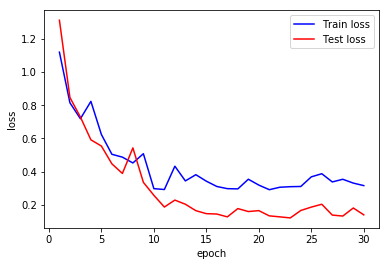

In [81]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

x=list(range(1,30+1))

vy=history.history['val_loss']
ty=history.history['loss']

def plt_dynamic(x,y,y_1,ax,colors=['b']):
    ax.plot(x,y,'b',label='Train loss')
    ax.plot(x,y_1,'r',label='Test loss')
    plt.legend()
    fig.canvas.draw()
plt_dynamic(x,vy,ty,ax)

In [83]:
scores=model.evaluate(X_test,Y_test,verbose=0,batch_size=4096)
print("accuracy",scores[1]*100)

accuracy 91.44893288612366


In [91]:
from sklearn import metrics
pred=model.predict(X_test)
cm=metrics.confusion_matrix(np.argmax(Y_test,axis=1),np.argmax(pred,axis=1))
print("Confusion Matrix\n\n",cm)

Confusion Matrix

 [[465  21   9   0   1   0]
 [  5 462   1   3   0   0]
 [  0   0 420   0   0   0]
 [  0   2   0 385 103   1]
 [  0   0   0  82 450   0]
 [  0  24   0   0   0 513]]


It is only confusing between standing and walking, rest all is working fine.